In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\imins\Downloads\sensor.csv")

In [3]:
df = df.drop(['sensor_15','sensor_50','Unnamed: 0', 'timestamp'],axis=1)

In [4]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING', nan], dtype=object)

In [5]:
df['machine_status'].value_counts()

NORMAL        199730
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [6]:
df['machine_status'] = np.where((df['machine_status'] == "RECOVERING") | (df['machine_status'] == "BROKEN"), 'BROKEN','NORMAL')
cl =df.copy()
cl =cl.drop(['machine_status'],axis =1)
b = cl.columns
for a in b:
    df.fillna({a:df[a].median()},inplace=True)
outliers_list= b
for j in outliers_list:
    Q1 = df[j].quantile(0.1)
    Q3 = df[j].quantile(0.9)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[j].where(df[j] >=l_lim,l_lim, inplace=True)  #clipping all lower outliers with lower limit
    df[j].where(df[j] <=u_lim,u_lim, inplace=True)  #clipping all upper outliers with upper-limit    
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [7]:
df['machine_status']= label_encoder.fit_transform(df['machine_status'])
df['machine_status'].unique()

array([1, 0])

In [8]:
df['machine_status'].value_counts()

1    205836
0     14484
Name: machine_status, dtype: int64

Text(0.5, 1.0, 'Heatmap')

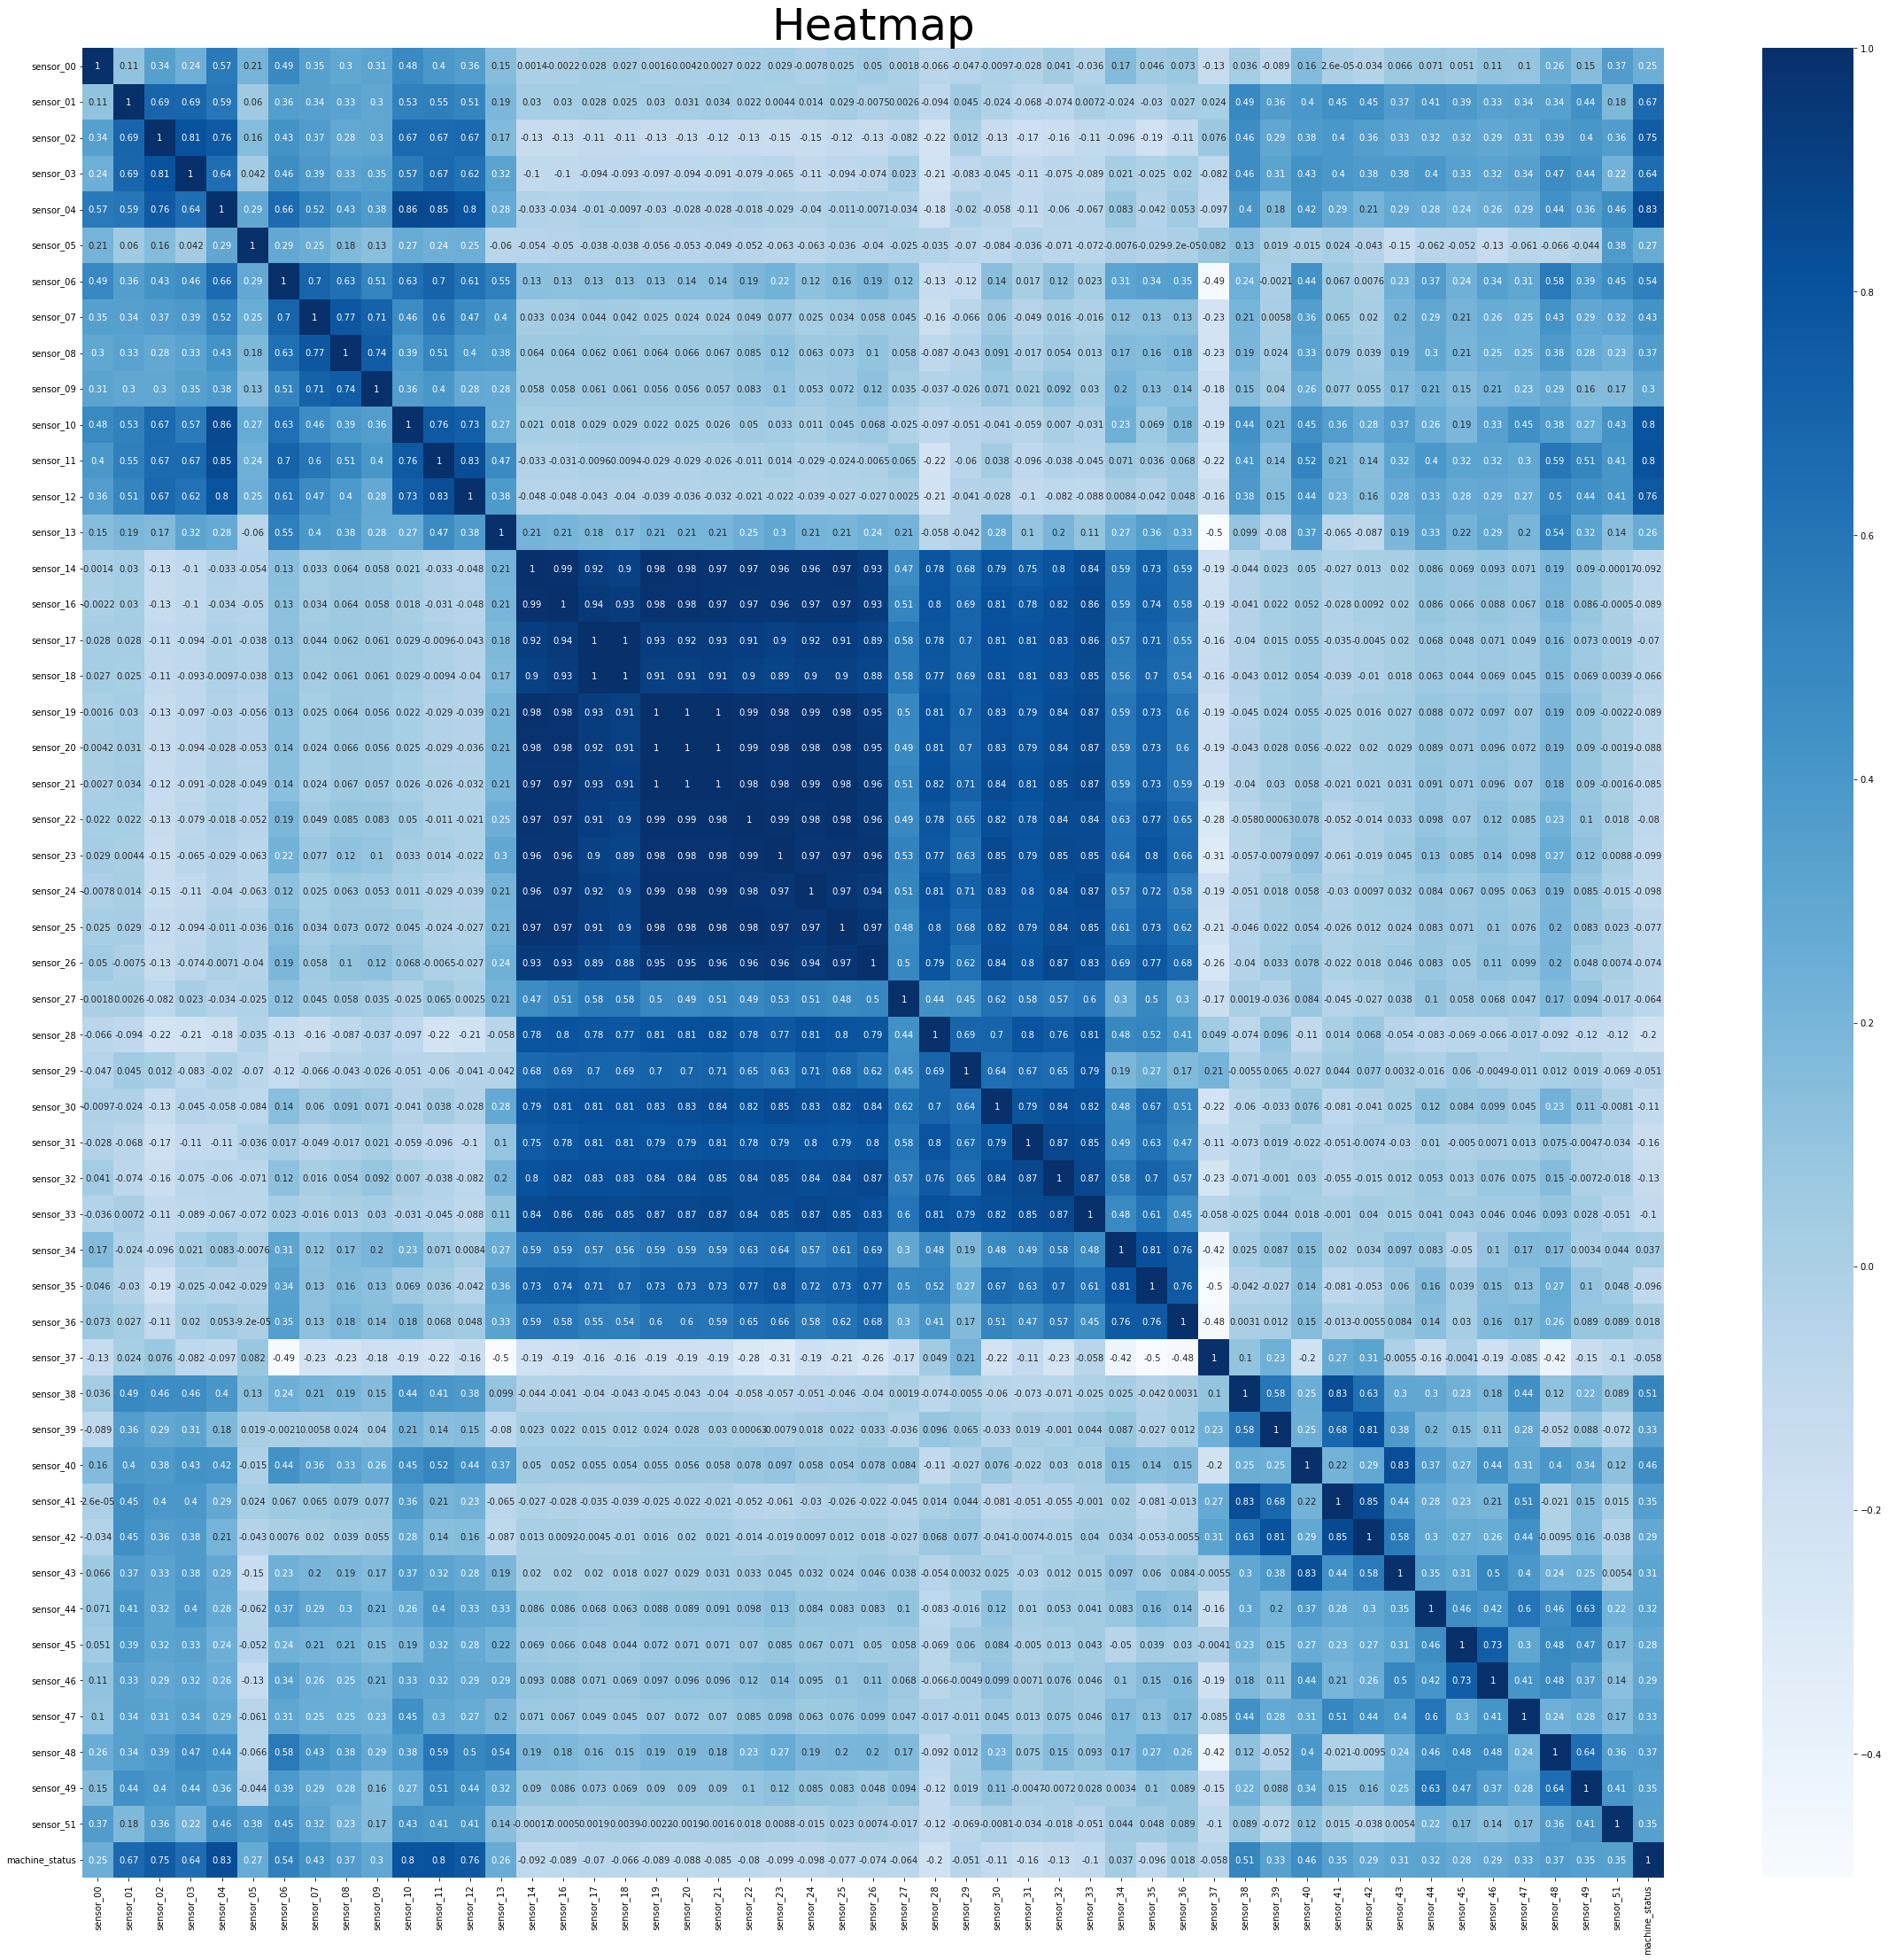

In [9]:
plt.figure(figsize=(40,38))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.title('Heatmap', fontsize = 50)

#### Sensor 4, 10, 11 and 12 are highly correlated to Machine status.

In [10]:
X= df[['sensor_04','sensor_10','sensor_11','sensor_12']]
y= df['machine_status']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm_scale=MinMaxScaler(feature_range=(0,1))
min_data=mm_scale.fit_transform(X)
min_data=pd.DataFrame(min_data,columns = X.columns)
#min_data.head()
X_train_min,X_test_min,y_train_min,y_test_min=train_test_split(min_data,y,test_size=0.2,random_state=40)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
std_data = ss.fit_transform(X)
std_data = pd.DataFrame(std_data, columns = X.columns)
#std_data.head()
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(std_data,y,test_size=0.2,random_state=40)

In [14]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
rb_data = robust_scaler.fit_transform(X)
rb_data = pd.DataFrame(rb_data, columns = X.columns)
#rb_data.head()
X_train_rb,X_test_rb,y_train_rb,y_test_rb=train_test_split(rb_data,y,test_size=0.2,random_state=40)

In [15]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [16]:
#initialising the classifiers
DTC = DecisionTreeClassifier(random_state=42)
GNB = GaussianNB()
lr = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)

## Logistic regression

In [17]:
#Applying Logistical Regression on minmax scaled data
lr.fit(X_train_min, y_train_min)
y_pred=lr.predict(X_test_min)
print("Measuring Efficiency of Logistic Regression on min max scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_min,y_pred))
print('Accuracy is',accuracy_score(y_test_min,y_pred))
print('Precision is',precision_score(y_test_min,y_pred,average='macro'))
print('Recall is',recall_score(y_test_min,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_min,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_min,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Logistic Regression on min max scaled data

Confusion Matrix is :
 [[ 2890    30]
 [  345 40799]]
Accuracy is 0.991489651416122
Precision is 0.9463095847070242
Recall is 0.9906704218261821
F1 score is 0.9672496233057579 

Mean Squared Error:  0.09225155057709326


In [18]:
#Applying Logistical Regression on standard scaled data
lr.fit(X_train_std, y_train_std)
y_pred=lr.predict(X_test_std)
print("Measuring Efficiency of Logistic Regression on standard scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_std,y_pred))
print('Accuracy is',accuracy_score(y_test_std,y_pred))
print('Precision is',precision_score(y_test_std,y_pred,average='macro'))
print('Recall is',recall_score(y_test_std,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_std,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_std,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Logistic Regression on standard scaled data

Confusion Matrix is :
 [[ 2889    31]
 [  334 40810]]
Accuracy is 0.9917165940450254
Precision is 0.9478054003013572
Recall is 0.9906328657917798
F1 score is 0.9680653716180379 

Mean Squared Error:  0.09101321857276877


In [19]:
#Applying Logistical Regression on robust scaled data
lr.fit(X_train_rb, y_train_rb)
y_pred=lr.predict(X_test_rb)
print("Measuring Efficiency of Logistic Regression on robust scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_rb,y_pred))
print('Accuracy is',accuracy_score(y_test_rb,y_pred))
print('Precision is',precision_score(y_test_rb,y_pred,average='macro'))
print('Recall is',recall_score(y_test_rb,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_rb,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_rb,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Logistic Regression on robust scaled data

Confusion Matrix is :
 [[ 2889    31]
 [  333 40811]]
Accuracy is 0.9917392883079158
Precision is 0.9479445110589685
Recall is 0.9906450182319897
F1 score is 0.9681480671188287 

Mean Squared Error:  0.09088845741943385


### Decision Tree

In [20]:
#Applying Decision Tree Classifier on min max scaled data
DTC.fit(X_train_min, y_train_min)
y_pred=DTC.predict(X_test_min)
print("Measuring Efficiency of Decision Tree Classifier on min max scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_min,y_pred))
print('Accuracy is',accuracy_score(y_test_min,y_pred))
print('Precision is',precision_score(y_test_min,y_pred,average='macro'))
print('Recall is',recall_score(y_test_min,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_min,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_min,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Decision Tree Classifier on min max scaled data

Confusion Matrix is :
 [[ 2860    60]
 [  188 40956]]
Accuracy is 0.9943718228031954
Precision is 0.9684286831027339
Recall is 0.9874413686377814
F1 score is 0.9777132698638111 

Mean Squared Error:  0.07502117832188887


In [21]:
#Applying Decision Tree Classifier on standard scaled data
DTC.fit(X_train_std, y_train_std)
y_pred=DTC.predict(X_test_std)
print("Measuring Efficiency of Decision Tree Classifier on standard scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_std,y_pred))
print('Accuracy is',accuracy_score(y_test_std,y_pred))
print('Precision is',precision_score(y_test_std,y_pred,average='macro'))
print('Recall is',recall_score(y_test_std,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_std,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_std,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Decision Tree Classifier on standard scaled data

Confusion Matrix is :
 [[ 2856    64]
 [  185 40959]]
Accuracy is 0.994349128540305
Precision is 0.9688023240032743
Recall is 0.986792894451562
F1 score is 0.9775990357418881 

Mean Squared Error:  0.07517227853201597


In [22]:
#Applying Decision Tree Classifier on robust scaled data
DTC.fit(X_train_rb, y_train_rb)
y_pred=DTC.predict(X_test_rb)
print("Measuring Efficiency of Decision Tree Classifier on robust scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_rb,y_pred))
print('Accuracy is',accuracy_score(y_test_rb,y_pred))
print('Precision is',precision_score(y_test_rb,y_pred,average='macro'))
print('Recall is',recall_score(y_test_rb,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_rb,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_rb,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Decision Tree Classifier on robust scaled data

Confusion Matrix is :
 [[ 2858    62]
 [  185 40959]]
Accuracy is 0.9943945170660857
Precision is 0.9688466555963501
Recall is 0.9871353602049867
F1 score is 0.977785875431201 

Mean Squared Error:  0.0748697731659066


### Support Vector Machine

In [23]:
#Applying Support Vector Machine Classifier on min max scaled data
SVM.fit(X_train_min, y_train_min)
y_pred=SVM.predict(X_test_min)
print("Measuring Efficiency of Support Vector Machine Classifier on min max scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_min,y_pred))
print('Accuracy is',accuracy_score(y_test_min,y_pred))
print('Precision is',precision_score(y_test_min,y_pred,average='macro'))
print('Recall is',recall_score(y_test_min,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_min,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_min,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Support Vector Machine Classifier on min max scaled data

Confusion Matrix is :
 [[ 2890    30]
 [  249 40895]]
Accuracy is 0.9936683006535948
Precision is 0.9599711630320111
Recall is 0.9918370560863417
F1 score is 0.9752766095438984 

Mean Squared Error:  0.07957197588601925


In [24]:
#Applying Support Vector Machine Classifier on standard scaled data
SVM.fit(X_train_std, y_train_std)
y_pred=SVM.predict(X_test_std)
print("Measuring Efficiency of Support Vector Machine Classifier on standard scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_std,y_pred))
print('Accuracy is',accuracy_score(y_test_std,y_pred))
print('Precision is',precision_score(y_test_std,y_pred,average='macro'))
print('Recall is',recall_score(y_test_std,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_std,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_std,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Support Vector Machine Classifier on standard scaled data

Confusion Matrix is :
 [[ 2889    31]
 [  252 40892]]
Accuracy is 0.9935775236020334
Precision is 0.9595066267090329
Recall is 0.9916293658889992
F1 score is 0.9749298165311091 

Mean Squared Error:  0.08014035436636523


In [25]:
#Applying Support Vector Machine Classifier on robust scaled data
SVM.fit(X_train_rb, y_train_rb)
y_pred=SVM.predict(X_test_rb)
print("Measuring Efficiency of Support Vector Machine Classifier on robust scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_rb,y_pred))
print('Accuracy is',accuracy_score(y_test_rb,y_pred))
print('Precision is',precision_score(y_test_rb,y_pred,average='macro'))
print('Recall is',recall_score(y_test_rb,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_rb,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_rb,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Support Vector Machine Classifier on robust scaled data

Confusion Matrix is :
 [[ 2889    31]
 [  260 40884]]
Accuracy is 0.9933959694989106
Precision is 0.9583382188643109
Recall is 0.9915321463673192
F1 score is 0.9742525899329864 

Mean Squared Error:  0.08126518627979219


### Random Forest

In [26]:
#Applying Random Forest Classifier Algorithm on min max scaled data
RFC.fit(X_train_min, y_train_min)
y_pred=RFC.predict(X_test_min)
print("Measuring Efficiency of Random Forest Classifier on min max scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_min,y_pred))
print('Accuracy is',accuracy_score(y_test_min,y_pred))
print('Precision is',precision_score(y_test_min,y_pred,average='macro'))
print('Recall is',recall_score(y_test_min,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_min,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_min,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Random Forest Classifier on min max scaled data

Confusion Matrix is :
 [[ 2860    60]
 [  178 40966]]
Accuracy is 0.9945987654320988
Precision is 0.9699731671949583
Recall is 0.9875628930398813
F1 score is 0.9785786375383434 

Mean Squared Error:  0.0734930919740164


In [27]:
#Applying Random Forest Classifier Algorithm on standard scaled data
RFC.fit(X_train_std, y_train_std)
y_pred=RFC.predict(X_test_std)
print("Measuring Efficiency of Random Forest Classifier on standard scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_std,y_pred))
print('Accuracy is',accuracy_score(y_test_std,y_pred))
print('Precision is',precision_score(y_test_std,y_pred,average='macro'))
print('Recall is',recall_score(y_test_std,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_std,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_std,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Random Forest Classifier on standard scaled data

Confusion Matrix is :
 [[ 2855    65]
 [  177 40967]]
Accuracy is 0.9945079883805374
Precision is 0.9700192809164712
Recall is 0.9867188810965297
F1 score is 0.9781982495477841 

Mean Squared Error:  0.07410810764999064


In [28]:
#Applying Random Forest Classifier Algorithm on robust scaled data
RFC.fit(X_train_rb, y_train_rb)
y_pred=RFC.predict(X_test_rb)
print("Measuring Efficiency of Random Forest Classifier on robust scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_rb,y_pred))
print('Accuracy is',accuracy_score(y_test_rb,y_pred))
print('Precision is',precision_score(y_test_rb,y_pred,average='macro'))
print('Recall is',recall_score(y_test_rb,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_rb,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_rb,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of Random Forest Classifier on robust scaled data

Confusion Matrix is :
 [[ 2858    62]
 [  179 40965]]
Accuracy is 0.9945306826434277
Precision is 0.9697745284454492
Recall is 0.9872082748462467
F1 score is 0.9783052430611894 

Mean Squared Error:  0.07395483321982586


### K Nearest Neighbor

In [29]:
#Applying K Nearest Neighbor Classifier on min max scaled Data
KNN.fit(X_train_min, y_train_min)
y_pred=KNN.predict(X_test_min)
print("Measuring Efficiency of K Nearest Neighbor CLassifier on min max scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_min,y_pred))
print('Accuracy is',accuracy_score(y_test_min,y_pred))
print('Precision is',precision_score(y_test_min,y_pred,average='macro'))
print('Recall is',recall_score(y_test_min,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_min,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_min,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of K Nearest Neighbor CLassifier on min max scaled data

Confusion Matrix is :
 [[ 2874    46]
 [  201 40943]]
Accuracy is 0.9943945170660857
Precision is 0.9667559470149338
Recall is 0.989680647189024
F1 score is 0.9778958408830722 

Mean Squared Error:  0.0748697731659066


In [30]:
#Applying K Nearest Neighbor Classifier on standard scaled data
KNN.fit(X_train_std, y_train_std)
y_pred=KNN.predict(X_test_std)
print("Measuring Efficiency of K Nearest Neighbor CLassifier on standard scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_std,y_pred))
print('Accuracy is',accuracy_score(y_test_std,y_pred))
print('Precision is',precision_score(y_test_std,y_pred,average='macro'))
print('Recall is',recall_score(y_test_std,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_std,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_std,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of K Nearest Neighbor CLassifier on standard scaled data

Confusion Matrix is :
 [[ 2876    44]
 [  201 40943]]
Accuracy is 0.9944399055918663
Precision is 0.9668015609854466
Recall is 0.9900231129424487
F1 score is 0.9780816002478354 

Mean Squared Error:  0.07456604058238324


In [31]:
#Applying K Nearest Neighbor Classifier on robust scaled data 
KNN.fit(X_train_rb, y_train_rb)
y_pred=KNN.predict(X_test_rb)
print("Measuring Efficiency of K Nearest Neighbor CLassifier on robust scaled data\n")
print("Confusion Matrix is :\n",confusion_matrix(y_test_rb,y_pred))
print('Accuracy is',accuracy_score(y_test_rb,y_pred))
print('Precision is',precision_score(y_test_rb,y_pred,average='macro'))
print('Recall is',recall_score(y_test_rb,y_pred,average='macro'))
print('F1 score is',f1_score(y_test_rb,y_pred,average='macro'),"\n")
rmse = np.sqrt(metrics.mean_squared_error(y_test_rb,y_pred))
print("Mean Squared Error: ",rmse)

Measuring Efficiency of K Nearest Neighbor CLassifier on robust scaled data

Confusion Matrix is :
 [[ 2873    47]
 [  200 40944]]
Accuracy is 0.9943945170660857
Precision is 0.9668852130224422
Recall is 0.9895215667525217
F1 score is 0.9778890026432595 

Mean Squared Error:  0.0748697731659066
